<a href="https://colab.research.google.com/github/JSEFERINO/Estadistica_Moderna/blob/main/56_C_Datos_A_E_Datos_ACP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Curso Teoría de Probabilidad por Julio Hurtado Márquez**
## **Parte XIII- Análisis Exploratorio de Datos**
# **Librerias para usar en esta parte del curso**

In [ ]:
# **Librerias para usar en esta parte del cursor**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # para visualizacion de datos
%matplotlib inline
import seaborn as sns # para visualizacion de datos
from scipy import stats
import warnings # Para ignorar todas las advertencias
warnings.filterwarnings("ignore", category=FutureWarning)
from sympy.functions.combinatorial.factorials import factorial
import math
from math import sqrt
from numpy.ma.core import log
from sympy import integrate, init_printing
from sympy.abc import x
print("Setup Complete")

Setup Complete


# **227. Predicción de mecanismos de acción (MoA) - Descripción de los datos**
+ LINK: https://www.kaggle.com/competitions/lish-moa/overview
## **a. ¿Puedes mejorar el algoritmo que clasifica los fármacos en función de su actividad biológica?**
+ El Mapa de Conectividad , un proyecto dentro del Instituto Broad del MIT y Harvard, el Laboratorio para la Ciencia de la Innovación en Harvard (LISH) y la Biblioteca de Fondos Comunes NIH de Firmas Celulares Integradas Basadas en Redes (LINCS), presentan este desafío con el objetivo de avanzar en el desarrollo de fármacos a través de mejoras en los algoritmos de predicción de MoA.

## **b. ¿Qué es el Mecanismo de Acción (MoA) de un fármaco? ¿Y porque es importante?**
 - En el pasado, los científicos obtenían medicamentos de productos naturales o se inspiraban en remedios tradicionales. Medicamentos muy comunes, como el paracetamol, conocido en los EE. UU. como acetaminofén, se pusieron en uso clínico décadas antes de que se entendieran los mecanismos biológicos que impulsan sus actividades farmacológicas. Hoy, con el advenimiento de tecnologías más poderosas, el descubrimiento de fármacos ha cambiado de los enfoques fortuitos del pasado a un modelo más específico basado en la comprensión del mecanismo biológico subyacente de una enfermedad. En este nuevo marco, los científicos buscan identificar una proteína diana asociada con una enfermedad y desarrollar una molécula que pueda modular esa proteína _"target"_. Como abreviatura para describir la actividad biológica de una molécula determinada, los científicos asignan una etiqueta denominada mecanismo de acción o MoA para abreviar.

## **c. ¿Cómo determinamos los MoA de un nuevo fármaco?**

  - Un enfoque es tratar una muestra de células humanas con el fármaco y luego analizar las respuestas celulares con algoritmos que buscan similitudes con patrones conocidos en grandes bases de datos genómicas, como bibliotecas de expresión génica o patrones de viabilidad celular de fármacos con MoA conocidos.

  - En esta competencia, tendrá acceso a un conjunto de datos único que combina datos de expresión génica y viabilidad celular. Los datos se basan en una nueva tecnología que mide simultáneamente (dentro de las mismas muestras) las respuestas de las células humanas a los medicamentos en un grupo de 100 tipos de células diferentes (resolviendo así el problema de identificar ex-ante qué tipos de células son más adecuados para un medicamento administrado). Además, tendrá acceso a las anotaciones de MoA para más de 5000 medicamentos en este conjunto de datos.

  - Como es habitual, el conjunto de datos se ha dividido en subconjuntos de prueba y entrenamiento. Por lo tanto, su tarea es usar el conjunto de datos de entrenamiento para desarrollar un algoritmo que etiquete automáticamente cada caso en el conjunto de prueba como una o más clases de MoA. Tenga en cuenta que dado que los medicamentos pueden tener múltiples anotaciones de MoA, la tarea es formalmente un problema de clasificación de etiquetas múltiples.

## **d. ¿Cómo evaluar la precisión de una solución?**

  - Con base en las anotaciones de MoA, la precisión de las soluciones se evaluará en el valor promedio de la función de pérdida logarítmica aplicada a cada par de anotaciones de fármaco-MoA.

  - Si tiene éxito, ayudará a desarrollar un algoritmo para predecir el MoA de un compuesto dada su firma celular, lo que ayudará a los científicos a avanzar en el proceso de descubrimiento de fármacos.

## **e. Descripción del conjunto de datos**
+ En esta competencia, predecirá múltiples objetivos de la(s) respuesta(s) del mecanismo de acción (MoA) de diferentes muestras ( sig_id), dadas varias entradas, como datos de expresión génica y datos de viabilidad celular.

+ Dos notas:

 - los datos de entrenamiento tienen un conjunto adicional (opcional) de etiquetas MoA que no están incluidas en los datos de prueba y no se usan para calificar.
 - el conjunto de datos de repetición tiene aproximadamente 4 veces la cantidad de ejemplos vistos en la prueba pública.
archivos
 - **train_features.csv** - Funciones para el conjunto de entrenamiento. Las características g-significan datos de expresión génica y c-significan datos de viabilidad celular. cp_typeindica muestras tratadas con un compuesto ( cp_vehicle) o con una perturbación de control ( ctrl_vehicle); las perturbaciones de control no tienen MoA; cp_timee cp_doseindicar duración del tratamiento (24, 48, 72 horas) y dosis (alta o baja).
 - **train_drug.csv-** Este archivo contiene un drug_id anónimo solo para el conjunto de entrenamiento.
 - **train_targets_scored.csv**- Los objetivos de MoA binarios que se puntúan.
 - **train_targets_nonscored.csv** - Respuestas MoA binarias adicionales (opcionales) para los datos de entrenamiento. Estos no están previstos ni puntuados.
 - **test_features.csv**- Características para los datos de prueba. Debe predecir la probabilidad de cada MoA puntuado para cada fila en los datos de prueba.
 - **sample_submission.csv**- Un archivo de envío en el formato correcto.

# **228. Parte I: Ejemplo 1.  Análisis de Componentes Princiapales (PCA) - Análisis Exploratorio de Datos**

# **a. Base de datos - PCA**

# **a1. Importamos la Libreria de Google_Colab para conectarnos al Drive**

In [ ]:
# **a1. Importamos la Libreria de Google_Colab para conectarnos al Drive**
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **a2. Indicamos a m cuaderno que vamos a trabajar con mi carpeta donde estan los Datos**

In [ ]:
## **a2. Indicamos a m cuaderno que vamos a trabajar con mi carpeta donde estan los Datos**
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/C_DATOS202350/C_DATOS202350_2/lish_moa')

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

In [ ]:

train_features = pd.read_csv('train_features.csv')
train_targets_scored = pd.read_csv('train_targets_scored.csv')
train_targets_nonscored = pd.read_csv('train_targets_nonscored.csv')
sample_submission = pd.read_csv('sample_submission.csv')
test_features = pd.read_csv('test_features.csv')

In [ ]:
def make_features(train_features):
    train_features['cp_type'] = (train_features['cp_type'] == 'ctl_vehicle').astype(int)
    train_features['cp_time'] = (train_features['cp_time'] - 48) / 24
    train_features['cp_dose'] = (train_features['cp_dose'] == 'D1').astype(int)
    train_features_ids = train_features.pop('sig_id')
    return (train_features, train_features_ids)

In [ ]:
train_features, train_features_ids = make_features(train_features)
test_features, test_features_ids = make_features(test_features)

train_targets_scored_sig_id = train_targets_scored.pop('sig_id')

print (train_features.shape, test_features.shape)

(23814, 875) (3982, 875)


In [ ]:
ii = train_features.cp_type.values==0
train_features = train_features.loc[ii]
train_targets_scored = train_targets_scored.loc[ii]
print (train_features.shape, test_features.shape)

(21948, 875) (3982, 875)


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [ ]:
train_targets_scored.head()

,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_dataset = TensorDataset(torch.tensor(train_features.values, dtype=torch.float32).to(device),
                              torch.tensor(train_targets_scored.values, dtype=torch.float32).to(device))
train_dataloader = DataLoader(train_dataset, batch_size=256, shuffle=True)

In [ ]:
train_features.shape, train_targets_scored.shape

((21948, 875), (21948, 206))

In [ ]:
class MyModel(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.in_features = in_features
        self.out_features = out_features

        self.model = nn.Sequential(
            nn.BatchNorm1d(in_features),
            nn.Linear(in_features, 800),
            nn.ReLU(),

            nn.BatchNorm1d(800),            # nn.Dropout(0.1),
            nn.Linear(800, 600),
            nn.ReLU(),

            nn.BatchNorm1d(600),            # nn.Dropout(0.1),
            nn.Linear(600, 400),
            nn.ReLU(),

            nn.BatchNorm1d(400),
            nn.Linear(400, out_features),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

In [ ]:
train_features.shape[1], train_targets_scored.shape[1]

(875, 206)

In [ ]:
train_dataloader

In [ ]:
%%time
model = MyModel(train_features.shape[1], train_targets_scored.shape[1]).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3) #SGD(model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 0.05, 10)
criterion = nn.BCELoss()
max_epoch = 20

for epoch in range(max_epoch):
    model.train()
    for i, (x_batch, y_batch) in enumerate(train_dataloader):
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        preds = model(x_batch)

        optimizer.zero_grad()

        #print(preds.shape)

        loss = criterion(preds, y_batch)
        loss.backward()
        optimizer.step()

        if i % 100 == 0:
            print(f'Epoch: {epoch}, train loss: {loss.item():12.5f}')

    model.eval()
    with torch.no_grad():
        train, y_train = train_dataset.tensors
        train, y_train = train.to(device), y_train.to(device)
        train_preds = model(train)
        train_loss = criterion(train_preds, y_train).item()

Epoch: 0, train loss:      0.73323
Epoch: 1, train loss:      0.07264
Epoch: 2, train loss:      0.02378
Epoch: 3, train loss:      0.01797
Epoch: 4, train loss:      0.01651
Epoch: 5, train loss:      0.01558
Epoch: 6, train loss:      0.01468
Epoch: 7, train loss:      0.01387
Epoch: 8, train loss:      0.01203
Epoch: 9, train loss:      0.00933
Epoch: 10, train loss:      0.00958
Epoch: 11, train loss:      0.00600
Epoch: 12, train loss:      0.00573
Epoch: 13, train loss:      0.00375
Epoch: 14, train loss:      0.00350
Epoch: 15, train loss:      0.00213
Epoch: 16, train loss:      0.00144
Epoch: 17, train loss:      0.00108
Epoch: 18, train loss:      0.00122
Epoch: 19, train loss:      0.00089
CPU times: user 2min 16s, sys: 5.99 s, total: 2min 22s
Wall time: 2min 23s


In [ ]:
# model = MyModel(train_features.shape[1], train_targets_scored.shape[1])
# optimizer = torch.optim.Adam(model.parameters()) #SGD(model.parameters(), lr=1e-3)
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 0.05, 10)
# criterion = nn.BCELoss()
# max_epoch = 6

# for epoch in range(max_epoch):
#     model.train()
#     for i, (x_batch, y_batch) in enumerate(train_dataloader):
#         preds = model(x_batch)

#         optimizer.zero_grad()
#         loss = criterion(preds, y_batch)
#         loss.backward()
#         optimizer.step()

#         if i % 20 == 0:
#             print(f'Epoch: {epoch}, train loss: {loss.item():12.5f}')

#     model.eval()
#     with torch.no_grad():
#         train, y_train = train_dataset.tensors
#         train_preds = model(train)
#         train_loss = criterion(train_preds, y_train).item()

# #         test, y_test = test_dataset.tensors
# #         test_preds = model(test)
# #         test_loss = criterion(test_preds, y_test).item()
#         print(f'Epoch {epoch} final: train loss: {train_loss}')#, f'test loss: {test_loss}')

In [ ]:
model.eval()
with torch.no_grad():
    probs = model(torch.tensor(test_features.values, dtype=torch.float32))

probs = probs.numpy()

In [ ]:
ii2 = test_features.cp_type.values==1 # 1 !!!!
probs[ii2,:] = 0.0

In [ ]:
df = pd.DataFrame(probs, index=test_features_ids, columns=train_targets_scored.columns)

In [ ]:
df.to_csv('submission.csv')

## **a3. Nuestros Datos de Entrenamiento y Prueba**

In [ ]:
## **a3. Nuestros Datos de Entrenamiento y Prueba**
train_f = pd.read_csv('train_features.csv')
test_f = pd.read_csv('test_features.csv')

In [ ]:
## **a3. Nuestros Datos de Entrenamiento y Prueba**
train_f.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


## **a4. La dimensión de la data**

In [ ]:
## **a4. La dimensión de la data**
train_f.shape

(23814, 876)

## **a5. Veamos si contiene datos perdidos**

In [ ]:
## **a5. Veamos si contiene datos perdidos**
train_f.isnull().sum()

sig_id     0
cp_type    0
cp_time    0
cp_dose    0
g-0        0
          ..
c-95       0
c-96       0
c-97       0
c-98       0
c-99       0
Length: 876, dtype: int64

In [ ]:
## **a5. Veamos si contiene datos perdidos**
train_f.isnull().sum().sum() # No hay datos faltantes

0

# **b. Preguntemonos si hay correlación entre las variables**

## **b1. Necesitamos únicamente las variables cuantitativas**

In [ ]:
## **b1. Necesitamos únicamente las variables cuantitativas**
train_f.select_dtypes(exclude='O').columns # Excluimos las variables string u object

Index(['cp_time', 'g-0', 'g-1', 'g-2', 'g-3', 'g-4', 'g-5', 'g-6', 'g-7',
       'g-8',
       ...
       'c-90', 'c-91', 'c-92', 'c-93', 'c-94', 'c-95', 'c-96', 'c-97', 'c-98',
       'c-99'],
      dtype='object', length=873)

## **b2. Una de las variables solo toma 3 valores**

In [ ]:
## **b2. Una de las variables solo toma 3 valores**
train_f['cp_time'].unique()

array([24, 72, 48])

## **b3. Elimanos la variable en cuestion de las variables numericas**

In [ ]:
## **b3. Elimanos la variable en cuestion de las variables numericas**
set_var = set(train_f.select_dtypes(exclude='O').columns)-set(['cp_time']) # Excluimos la variable
len(set_var) # Variables cuantitativas a estudiar

872

## **b4. Creamos un nuevo dataFrame con las variables cuantitativas**

In [ ]:
## **b4. Creamos un nuevo dataFrame con las variables cuantitativas**
train_f2 = train_f[set_var].copy()
train_f2.head()

,g-183,g-316,g-270,g-667,c-5,c-79,g-289,g-573,g-385,g-184,...,c-16,c-67,g-244,g-305,g-61,g-152,c-20,g-699,g-182,g-523
0,-0.2786,-0.1991,-0.6775,1.3580,-0.6797,-0.7318,0.0819,-0.0181,1.7600,0.2318,...,0.6376,1.2570,0.1905,0.0631,-0.1300,-0.1973,1.1560,-1.0710,0.2469,0.5738
1,-0.2166,1.0350,-0.4084,0.3260,0.5696,0.4329,-0.2131,-0.6928,-0.1022,-0.5338,...,-0.4210,-0.3104,-0.1172,0.2022,1.7840,0.5582,0.9950,2.2200,-0.2420,-0.5391
2,0.4284,-0.2815,-1.2020,-1.0320,0.5826,0.0690,0.7247,-0.1428,-1.1120,-0.2485,...,-0.6915,0.1210,0.3711,0.4912,0.8346,-0.6910,0.0773,-0.6892,0.5677,0.8832
3,0.0864,-1.0040,0.3340,-0.6745,-1.2670,-1.8460,0.0175,-1.1110,1.3170,0.8989,...,-1.3430,-3.1660,-0.2857,0.9815,1.4630,-3.0280,0.9197,-0.7887,-0.0022,-1.0670
4,0.1723,1.2150,-0.6745,1.0160,0.3204,-0.3966,-0.4059,1.3920,-1.1660,-0.6239,...,0.1332,0.5178,-0.4712,-0.4067,1.6410,0.7051,0.6995,-0.3670,-0.6177,-1.4080


# **b5. Preguntemonos si hay correlación entre las variables**

In [ ]:
# **b5. Preguntemonos si hay correlación entre las variables**
train_f2.corr()

,g-183,g-316,g-270,g-667,c-5,c-79,g-289,g-573,g-385,g-184,...,c-16,c-67,g-244,g-305,g-61,g-152,c-20,g-699,g-182,g-523
g-183,1.000000,0.486630,-0.466647,0.207884,0.689748,0.660365,-0.467464,-0.074925,0.406589,0.238575,...,0.642653,0.710428,-0.472072,-0.023164,0.402023,0.527438,0.687954,0.233651,-0.246066,0.247670
g-316,0.486630,1.000000,-0.448632,0.258392,0.580693,0.531422,-0.548913,-0.062821,0.322514,0.120561,...,0.556485,0.563596,-0.410628,-0.079056,0.527757,0.565505,0.588320,0.209754,-0.235418,0.220177
g-270,-0.466647,-0.448632,1.000000,-0.329263,-0.516490,-0.472235,0.562094,0.087631,-0.489177,-0.145900,...,-0.539391,-0.545711,0.354674,-0.061203,-0.373829,-0.599584,-0.574395,0.017617,0.269187,-0.333375
g-667,0.207884,0.258392,-0.329263,1.000000,0.263102,0.250400,-0.333841,-0.038781,0.219842,0.206784,...,0.243681,0.290576,-0.176975,-0.031839,0.104783,0.356998,0.288362,-0.187437,-0.115104,0.256765
c-5,0.689748,0.580693,-0.516490,0.263102,1.000000,0.856807,-0.562964,-0.063505,0.541054,0.226406,...,0.773152,0.867853,-0.531296,-0.065918,0.535346,0.613986,0.835350,0.294552,-0.243819,0.353267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
g-152,0.527438,0.565505,-0.599584,0.356998,0.613986,0.606319,-0.502196,-0.039821,0.300837,0.136908,...,0.531615,0.656922,-0.349151,0.093235,0.464697,1.000000,0.587518,0.068178,-0.363485,0.262134
c-20,0.687954,0.588320,-0.574395,0.288362,0.835350,0.786636,-0.638826,-0.088069,0.598296,0.254452,...,0.801814,0.829215,-0.544121,-0.064251,0.514565,0.587518,1.000000,0.233030,-0.238952,0.369584
g-699,0.233651,0.209754,0.017617,-0.187437,0.294552,0.301553,-0.052813,0.125660,0.021673,-0.131917,...,0.204420,0.242064,-0.081245,0.005236,0.276949,0.068178,0.233030,1.000000,-0.011331,0.111346
g-182,-0.246066,-0.235418,0.269187,-0.115104,-0.243819,-0.241977,0.205006,0.008492,-0.126024,-0.052695,...,-0.223522,-0.279423,0.131398,-0.131142,-0.156169,-0.363485,-0.238952,-0.011331,1.000000,-0.115500


## **b6. Triangulo de correlación y mapa de calor - Heatmap**
+ **La evidencia de una fuerte correlacion entre las variables es un indicio de que hay que usar el métodos de componentes principales**

<ipython-input-23-e23bfa96a41b>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(train_f2.corr().iloc[:20,:20], dtype=np.bool))


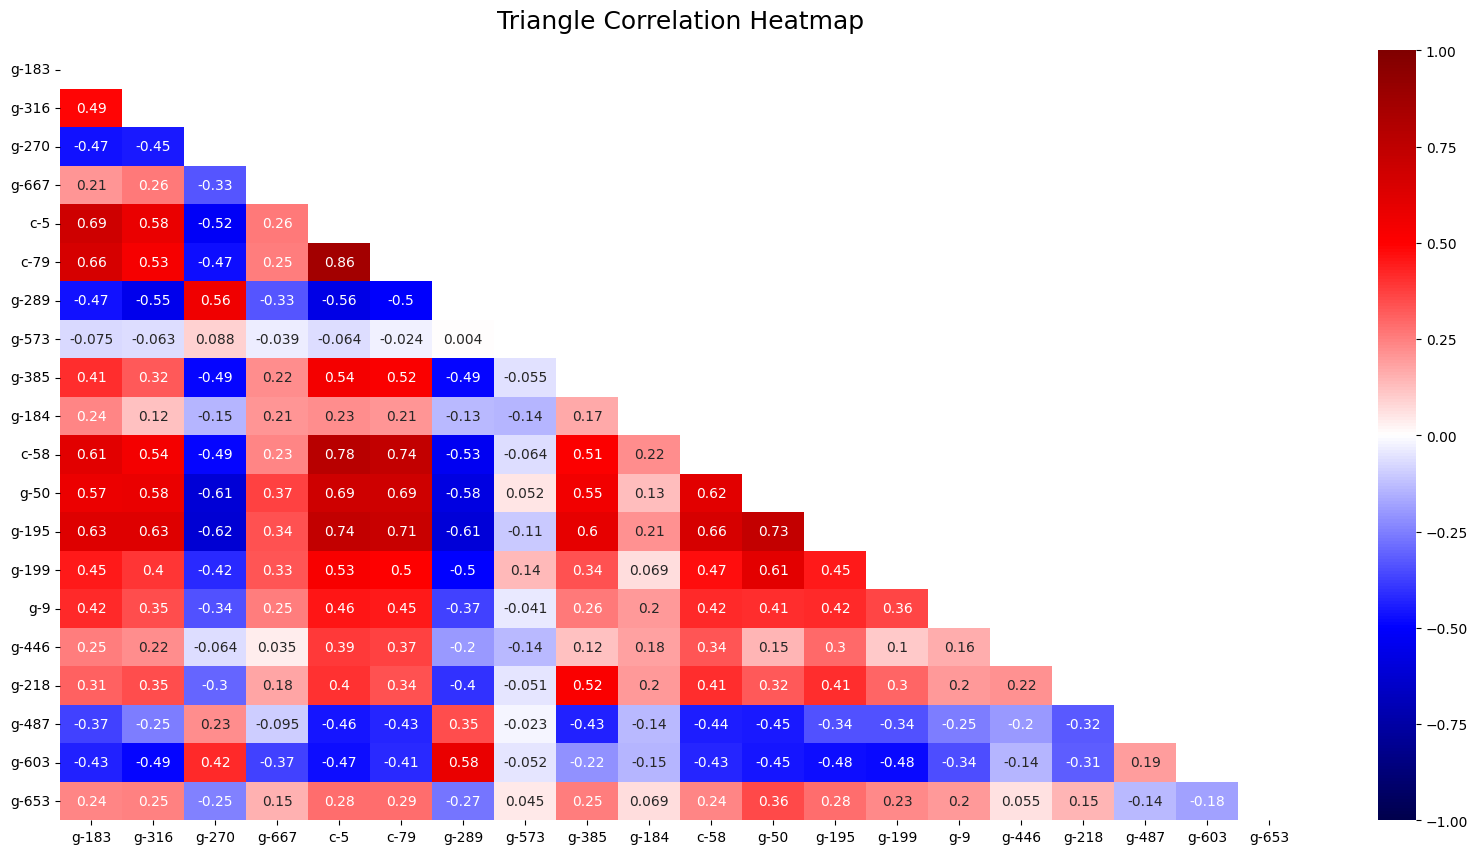

In [ ]:
# **f. Triangulo de correlación y mapa de calor - Heatmap**
plt.figure(figsize=(20,10))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(train_f2.corr().iloc[:20,:20], dtype=np.bool))
heatmap = sns.heatmap(train_f2.corr().iloc[:20,:20], mask=mask, vmin=-1, vmax=1, annot=True, cmap='seismic')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
plt.show()

## **c. Escalado de Variables**

# **c1. Estandarizamos o escalamos las variables para train_f2**

In [ ]:
# **c1. Estandarizamos o escalamos las variables para train_f2**

from sklearn.preprocessing import StandardScaler # Nuestra libreria para el PCA
std = StandardScaler() # Objeto de la clase StandarScaler tomara por defecto with_mean =0(True) y with_std =1(True)
std_train = std.fit_transform(train_f2) # hace lo solicitado a la base de datos
std_train

array([[-0.06492509, -0.06347323, -0.6062165 , ..., -0.99658659,
        -0.00350782,  0.71920982],
       [-0.0233341 ,  0.92363655, -0.44296313, ...,  1.73687613,
        -0.41270873, -0.54277515],
       [ 0.40934638, -0.12938187, -0.92441195, ..., -0.67946836,
         0.26499627,  1.07005728],
       ...,
       [ 0.49004632, -0.00292367, -0.20393737, ...,  0.23210117,
        -0.33294426,  0.24135874],
       [-0.37424132, -0.12986179,  1.22135986, ...,  0.80911015,
        -0.17299685,  1.0464709 ],
       [ 0.32066366, -0.91524635, -0.62071578, ..., -0.31392691,
        -0.21651995,  2.0008123 ]])

## **c2. Usamos la libreria donde esta la componente principal**

In [ ]:
# **c2. Usamos la libreria donde esta la componente principal**
from sklearn.decomposition import PCA

# Creamos un gráfico para que nos diga cuantas componentes queremos

PCA = PCA() # n_components = 2

# Obtenemos los componentes principales

std_train_pca = PCA.fit(std_train) # hace lo solicitado a la base de datos

# veamos lo que hizo
std_train_pca

PCA()

## **c3. Cuanta varianza corresponde a cada componente**

In [ ]:
## **c3. Cuanta varianza corresponde a cada componente**
std_train_pca.explained_variance_ratio_.shape # cuantas componentes encapsulan la información

(872,)

In [ ]:
## **c3. Cuanta varianza corresponde a cada componente**
print(std_train_pca.explained_variance_ratio_) # nos muestra la misma cantidad de variables

[2.87909149e-01 4.00901172e-02 3.22147738e-02 2.91516121e-02
 2.12586919e-02 2.07856137e-02 1.73290497e-02 1.64932037e-02
 1.26049723e-02 1.11435341e-02 1.02804241e-02 9.15801078e-03
 8.03674497e-03 7.55856479e-03 7.37260769e-03 7.13906833e-03
 6.35257400e-03 5.93876157e-03 5.33712955e-03 5.07556550e-03
 4.35428180e-03 4.30235005e-03 4.05801917e-03 3.79573608e-03
 3.60695593e-03 3.45271247e-03 3.38178407e-03 3.26646219e-03
 3.13128649e-03 3.03253914e-03 2.92289469e-03 2.76231067e-03
 2.72149646e-03 2.65671626e-03 2.54336273e-03 2.47649067e-03
 2.35921332e-03 2.33183343e-03 2.30419778e-03 2.20204259e-03
 2.12039086e-03 2.10742793e-03 2.05079933e-03 1.99950285e-03
 1.98462155e-03 1.91399138e-03 1.89850342e-03 1.86604796e-03
 1.82667243e-03 1.79049375e-03 1.74203329e-03 1.70123757e-03
 1.66852396e-03 1.65782117e-03 1.63865694e-03 1.62407952e-03
 1.61640868e-03 1.58460215e-03 1.57684253e-03 1.54010918e-03
 1.52982957e-03 1.50428291e-03 1.49465314e-03 1.46935623e-03
 1.44519927e-03 1.440090

## **c4. Varianza y varianza acumulada por las nuevas componentes principales**

In [ ]:
## **c4. Varianza y varianza acumulada por las nuevas componentes principales**
var_exp = pd.DataFrame({'Varianza':std_train_pca.explained_variance_ratio_, 'Varianza_acumulada':np.cumsum(std_train_pca.explained_variance_ratio_)})
var_exp

,Varianza,Varianza_acumulada
0,0.287909,0.287909
1,0.040090,0.327999
2,0.032215,0.360214
3,0.029152,0.389366
4,0.021259,0.410624
...,...,...
867,0.000045,0.999930
868,0.000031,0.999961
869,0.000014,0.999975
870,0.000013,0.999987


## **c5. Cuanta varianza corresponde a cada componente**

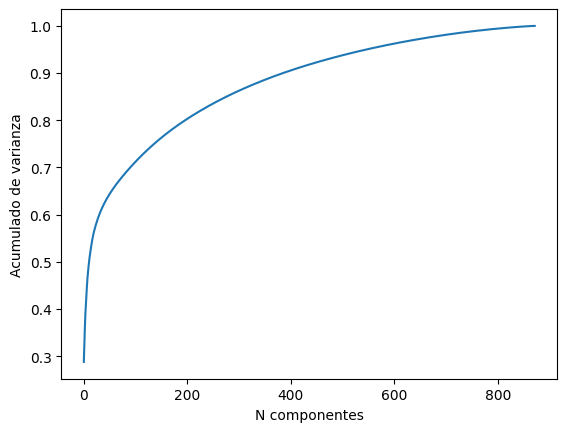

In [ ]:
## **c5. Cuanta varianza corresponde a cada componente**
var_exp = np.cumsum(std_train_pca.explained_variance_ratio_)# Esta es la varianza explicada
plt.plot(var_exp)
plt.xlabel('N componentes')
plt.ylabel('Acumulado de varianza')
plt.show()

## **c6. Queremos saber cuantas componentes necesitamos**

In [ ]:
# **c6. Queremos saber cuantas componentes necesitamos**
print('Cuantas componentes me explican mas del 60% de la varianza pero menos del 70%', np.where((var_exp>0.6)&(var_exp<0.7)))
print('Cuantas componentes me explican mas del 70% de la varianza pero menos del 80%', np.where((var_exp>0.7)&(var_exp<0.8)))
print('Cuantas componentes me explican mas del 80% de la varianza pero menos del 90%', np.where((var_exp>0.8)&(var_exp<0.90)))

Cuantas componentes me explican mas del 60% de la varianza pero menos del 70% (array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
       64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
       81, 82, 83, 84, 85, 86, 87, 88, 89]),)
Cuantas componentes me explican mas del 70% de la varianza pero menos del 80% (array([ 90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
       181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 

# **d. Número de componentes elegidos en el PCA**

## **d1. Usamos la libreria donde esta la componente principal**

In [ ]:
# **d1. Usamos la libreria donde esta la componente principal**

from sklearn.decomposition import PCA

# Creamos un gráfico para que nos diga cuantas componentes queremos

pca = PCA(n_components = 197) # n_components = 197

# Obtenemos los componentes principales

std_train_pca2 = pca.fit_transform(std_train) # data estandarizada

# veamos lo que hizo nos da dos nuevas columnas
std_train_pca2

array([[ -7.10721537,  -1.16519639,  -0.30874958, ...,   0.20501622,
         -0.93387474,   0.65147041],
       [ -6.36268934,   3.71171879,   7.18121048, ...,   0.49301598,
         -1.17247444,   0.06924498],
       [ -1.73236666,   2.38996376,  -3.21100777, ...,  -0.19691393,
         -0.73492754,  -0.30429936],
       ...,
       [ -6.31941392,  -1.13369928,  -0.13385475, ...,  -0.59824277,
         -0.04196789,  -0.48465376],
       [  0.54359195, -16.57176272,   5.91445007, ...,   0.54888257,
         -0.4366971 ,   0.29611844],
       [  9.28310752,   3.40870751,  -2.48660618, ...,   1.06100002,
          0.07288756,  -0.64962949]])

## **d2. Las dimensiones de la matriz con nuestras componentes principales**

In [ ]:
## **d2. Las dimensiones de la matriz**
std_train_pca2.shape # Tenemos menos variables que las originales

(23814, 197)

## **d3. Separando las componentes**

In [ ]:
## **d3. Separando las componentes**
pca_v2 = PCA(n_components = 197)
std_train_pca2 = pca_v2.fit_transform(std_train)

## **d4. Las 197 componentes se expresan como combinaciones de las 872 variables**

In [ ]:
## **d4. Las 197 componentes se expresan como combinaciones de las 872 variables**
pca_v2.components_.shape # Los loading tienen 197 filas y 872 columnas

(197, 872)

In [ ]:
## **d4. Las 197 componentes se expresan como combinaciones de las 872 variables**
pca_v2.components_.T.shape #Hicimos la transpuesta

(872, 197)

## **d5. En una tabla se expresan todas las componentes principales**

In [ ]:
## **d5. En una tabla se expresan todas las componentes principales**
lis_namepca = [f'PC{i}' for i in range(1,198)]
df_pca_loading = pd.DataFrame(pca_v2.components_.T, columns=lis_namepca)
df_pca_loading

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC188,PC189,PC190,PC191,PC192,PC193,PC194,PC195,PC196,PC197
0,-0.046595,-0.005398,-0.024013,-0.016488,0.028073,0.010847,0.021525,0.023569,0.041321,0.009983,...,0.042271,0.024377,-0.013696,-0.005743,-0.000885,0.034876,0.027714,0.010275,-0.034333,0.004889
1,-0.041854,0.011978,0.033934,-0.003787,0.024343,-0.014569,-0.005905,0.009855,-0.008836,0.070804,...,0.027862,-0.041135,0.009555,-0.019521,0.018154,0.018143,-0.007519,0.020039,0.045138,0.009755
2,0.040350,-0.049033,0.003515,-0.003941,-0.033049,0.052991,0.024759,0.042490,-0.004958,0.001770,...,0.012264,0.005077,0.020653,0.030144,-0.031071,-0.010518,-0.024067,0.007077,0.015548,0.012291
3,-0.022007,0.032864,-0.015628,0.056426,-0.024988,-0.045772,-0.078227,-0.000871,0.047652,-0.008526,...,-0.031857,-0.045045,-0.014111,0.065256,0.020253,0.047687,0.102969,0.051719,0.028769,-0.026269
4,-0.057470,-0.016894,0.000319,-0.005785,0.010778,0.021439,0.016244,0.025988,0.011369,-0.009009,...,-0.007184,-0.000695,0.007714,-0.003384,-0.009556,0.001885,0.007971,-0.003795,-0.006637,-0.000602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,-0.044575,0.063619,0.019132,-0.014028,0.026090,-0.029651,-0.045521,0.053845,0.014310,0.021232,...,-0.006846,-0.031165,0.022378,-0.000419,-0.018192,0.007940,0.002979,-0.005581,0.002059,0.015199
868,-0.057368,-0.011870,-0.010433,0.001354,0.015770,-0.002571,0.018732,-0.010539,-0.013554,0.010785,...,0.020515,0.000615,0.013012,0.001587,-0.003736,-0.001379,-0.004759,0.012607,0.001587,-0.009006
869,-0.015701,-0.027112,0.055573,-0.041016,0.010920,0.118402,0.037986,0.006336,-0.031601,-0.006564,...,-0.036487,-0.044866,0.026612,-0.034734,-0.048873,-0.007448,-0.014347,0.067290,-0.021506,0.039095
870,0.018239,-0.047820,0.012863,0.007818,-0.033252,0.014439,0.009269,-0.034990,0.017194,-0.006712,...,-0.007817,-0.033539,-0.054691,0.052015,0.001264,0.016503,0.002233,0.046179,-0.004757,0.042779


## **d6. Se prueban que las variables estan normalizadas**

In [ ]:
## **d6. Se prueban que las variables estan normalizadas**
df_pca_loading[['PC1']].apply(lambda x: sum(x**2))

PC1    1.0
dtype: float64